# Probability

You will use all of basic probability. 

Here we'll code a simple emprirical demonstration of the law of large numbers. 

In [6]:
%matplotlib inline
import torch
from torch.distributions import multinomial
import matplotlib.pyplot as plt

fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 1., 0., 0., 0., 0.])

In [7]:
# We can draw a lot of samples
# (in a manner that is much more efficient than a for loop)

multinomial.Multinomial(1000, fair_probs).sample()

tensor([142., 168., 173., 176., 149., 192.])

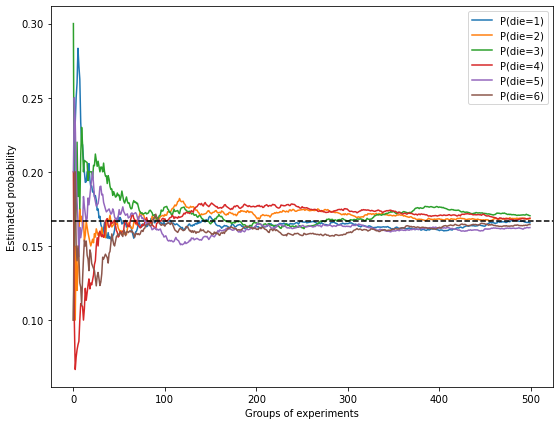

In [15]:
# Let's visualize how the empirical probabilities converge

# We sample 10 events at a time
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims = True)

plt.figure(figsize=(9, 7))
for i in range(6):
    plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
plt.axhline(y=0.167, color='black', linestyle='dashed')
plt.gca().set_xlabel('Groups of experiments')
plt.gca().set_ylabel('Estimated probability')
plt.legend();